In [34]:
import numpy as np
import math

nxstep = 128
xfinal = 2.0
xini = 0.0
xstep = (xfinal - xini) / nxstep
ntstep = 50000
tfinal = 2.1
tini = 0.0
tstep = (tfinal - tini) / ntstep

u = np.zeros((nxstep+3, ntstep+1))

for j in range(0, nxstep+1):
    u[j,0] = np.cos(np.pi * (xini + j * xstep))
u[nxstep+1,0] = u[1,0]
u[nxstep+2,0] = u[2,0]

for i in range(1, ntstep+1):
        for j in range(2, nxstep+1):
            u[j,i] = u[j,i-1] - tstep * (
                1.0/6.0/xstep * (u[j+1,i-1] + u[j,i-1] + u[j-1,i-1]) * (u[j+1,i-1] - u[j-1,i-1])
                + 0.022**2 * (u[j+2,i-1] - 2*u[j+1,i-1] + 2*u[j-1,i-1] - u[j-2,i-1]) / 2.0 / xstep**3
            )
        u[0,i] = u[0,i-1] - tstep * (
            1.0/6.0/xstep * (u[1,i-1] + u[0,i-1] + u[nxstep-1,i-1]) * (u[1,i-1] - u[nxstep-1,i-1])
            + 0.022**2 * (u[2,i-1] - 2*u[1,i-1] + 2*u[nxstep-1,i-1] - u[nxstep-2,i-1]) / 2.0 / xstep**3
        )
        u[1,i] = u[1,i-1] - tstep * (
            1.0/6.0/xstep * (u[2,i-1] + u[1,i-1] + u[0,i-1]) * (u[2,i-1] - u[0,i-1])
            + 0.022**2 * (u[3,i-1] - 2*u[2,i-1] + 2*u[0,i-1] - u[nxstep-1,i-1]) / 2.0 / xstep**3
        )
        u[nxstep+1,i] = u[1,i]
        u[nxstep+2,i] = u[2,i]
        


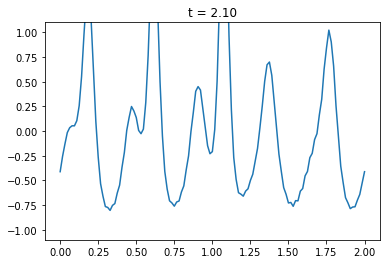

In [36]:

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Assuming u has been calculated as in previous examples

fig, ax = plt.subplots()
x = np.linspace(0, 2, nxstep+1)
line, = ax.plot(x, u[:nxstep+1,0])

def update(t):
    line.set_ydata(u[:nxstep+1,t])  # Update the y data with the u values at time t
    ax.set_title(f't = {t*tstep:.2f}')
    return line,

ani = FuncAnimation(fig, update, frames=range(0, 50001, 1000), blit=True, interval=50)

# Save the animation to a file
ani.save('wave_animation.gif', writer='pillow')

plt.show()
